In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.Получите и загрузите данные.

In [156]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2.Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [158]:
data = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
# data

In [159]:
data = data.dropna() # удаляем строки с нулевыми значениями
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [161]:
X = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [162]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
model.fit(X_train, y_train)

C:\Users\snikulin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
from sklearn.metrics import roc_curve

In [164]:
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [165]:
# for line in zip( fpr, tpr, thres ):
#     print(line)

In [166]:
from matplotlib import pyplot as plt

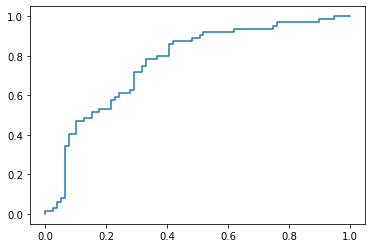

In [167]:
plt.plot( fpr, tpr )

In [168]:
from sklearn.metrics import auc

In [169]:
auc( fpr, tpr ) # значение ROC-AUC достаточно высокая

0.7678006329113924

3-4.Снова загрузите полные данные.
Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [170]:
data_2 = pd.read_csv('train.csv')
data_2.head()
# data_2.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
# data_2[['Survived', 'Parch']].value_counts()


In [172]:
# данные признаки являются не нужными для построения модели, т.к.являются категориальными, дублируются другими признаками. 
data2 = data_2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


5.Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [173]:
print('Для Age пустых строк: ' + str( len( data2[ pd.isnull( data2['Age'] ) ] ) ))
print('Всего строк в наборе: ' + str( len( data2 ) ))
print('% потерянных данных: ' + str( round(len( data2[ pd.isnull( data2['Age'] ) ] ) / (len( data2['Survived']) +                                                          
    len( data2['Pclass']) + len( data2['Sex']) + len( data2['Age']) + len( data2['SibSp']) + len( data2['Parch']) - 
    len( data2[ pd.isnull( data2['Age'] ) ] )) * 100, 2)) )

Для Age пустых строк: 177
Всего строк в наборе: 891
% потерянных данных: 3.42


In [174]:
data2[ pd.isnull( data2['Age'] ) ].head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0
29,0,3,male,NaN,0,0


In [175]:
# data2.describe()

In [176]:
mean_age = data2['Age'].mean()
mean_age

29.69911764705882

In [177]:
# заменяем пропуски ср.значением.
data2['Age'].fillna(value=mean_age, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [178]:
data2.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
5,0,3,male,29.699118,0,0


In [179]:
# data2['Age'].unique()

6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [180]:
# X = data2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [250]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [251]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data2[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

# столбец sex является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
data3 = pd.get_dummies( selectedColumns, columns = [ 'Sex' ] )

# столбец Survived является целевой переменной, удаляем его из X
# del X['Survived']
data3.head()


,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [239]:
# X.describe()

8.*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [252]:
x0 = data3.loc[data3.Survived == 0]
x1 = data3.loc[data3.Survived == 1]
len(x0), len(x1)

(549, 342)

In [265]:
x0f = data3.loc[(data3.Survived == 0) & (data3.Sex_female == 1)] # кол-во погибших женщин
x0m = data3.loc[(data3.Survived == 0) & (data3.Sex_male == 1)] # кол-во погибших мужчин
x1f = data3.loc[(data3.Survived == 1) & (data3.Sex_female == 1)] # кол-во выживших женщин
x1m = data3.loc[(data3.Survived == 1) & (data3.Sex_male == 1)] # кол-во выживших мужчин

len(x0f), len(x0m), len(x1f), len(x1m)

(81, 468, 233, 109)

In [266]:
print(f'Всего пассажиров "Титаника": {len(data3.Survived)} чел.')

print(f'Спаслось женщин: {round(len(x1f) / len(data3.Survived) * 100, 2)} %')
print(f'Спаслось мужчин: {round(len(x1m) / len(data3.Survived) * 100, 2)} %')

print(f'Погибло женщин: {round(len(x0f) / len(data3.Survived) * 100, 2)} %')
print(f'Погибло мужчин: {round(len(x0m) / len(data3.Survived) * 100, 2)} %')

print(f'Данный анализ показывает, что в первую очередь спасали женщин.')

Всего пассажиров "Титаника": 891 чел.
Спаслось женщин: 26.15 %
Спаслось мужчин: 12.23 %
Погибло женщин: 9.09 %
Погибло мужчин: 52.53 %
Данный анализ показывает, что в первую очередь спасали женщин.


In [253]:
import seaborn as sns

In [267]:
pd.pivot_table(data2,
               index=['Sex', 'Survived'], columns = 'Age', values = 'Pclass', aggfunc = 'count', fill_value = 0, margins = True)

Age              0.42  0.67  0.75  0.83  0.92  1.0  2.0  3.0  4.0  5.0  ...  \
Sex    Survived                                                         ...   
female 0            0     0     0     0     0    0    4    1    0    0  ...   
       1            0     0     2     0     0    2    2    1    5    4  ...   
male   0            0     0     0     0     0    2    3    0    3    0  ...   
       1            1     1     0     2     1    3    1    4    2    0  ...   
All                 1     1     2     2     1    7   10    6   10    4  ...   

Age              63.0  64.0  65.0  66.0  70.0  70.5  71.0  74.0  80.0  All  
Sex    Survived                                                             
female 0            0     0     0     0     0     0     0     0     0   81  
       1            2     0     0     0     0     0     0     0     0  233  
male   0            0     2     3     1     2     1     2     1     0  468  
       1            0     0     0     0     0     0     0     0     1  109  
All                 2     2     3     1     2     1     2     1     1  891  

[5 rows x 90 columns]

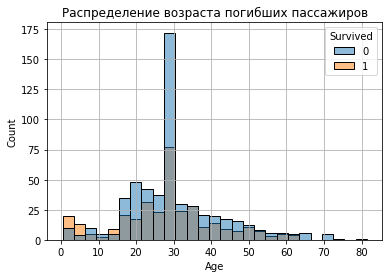

In [268]:
# sns.histplot(data=data2, x="Age", binwidth=3, hue="Sex")

# sns.histplot(data=data2, x="Survived", binwidth=0.05, hue="Sex")

sns.histplot(data=data2, x="Age", binwidth=3, hue="Survived")

plt.title('Распределение возраста погибших пассажиров')
plt.grid()



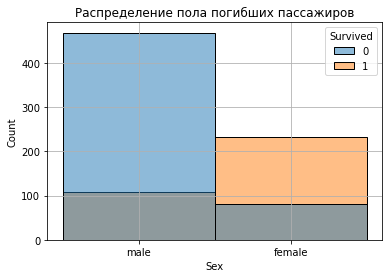

In [269]:
# sns.histplot(data=data2, x="Age", binwidth=3, hue="Sex")

# sns.histplot(data=data2, x="Survived", binwidth=0.05, hue="Sex")

sns.histplot(data=data2, x="Sex", binwidth=0.05, hue="Survived")

plt.title('Распределение пола погибших пассажиров')
plt.grid()

9.Попробуйте математически преобразовать признак Age.

In [270]:
data3.Age = data3.Age.astype('int')
# X.info()
y = data3['Survived']
X = data3[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']]


10.Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [271]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
model.fit(X_train, y_train)

LogisticRegression()

In [272]:
predictions2 = model.predict_proba(X_test)
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1])

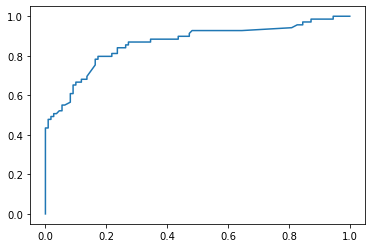

In [273]:
plt.plot( fpr2, tpr2 )

In [274]:
auc( fpr2, tpr2 ) # значение ROC-AUC высокое, т.о. модель работает более точно.

0.8632411067193676

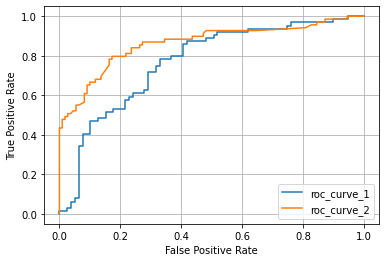

In [275]:
plt.plot( fpr, tpr, label = 'roc_curve_1' )
plt.plot( fpr2, tpr2, label = 'roc_curve_2' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.grid()

plt.legend( loc = 0 )
plt.show()

In [ ]:
# сохранение и преобразование важных категориальных признаков улучшает качество прогнозирования модели.